# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Rushad | Rakhimov | Rushad Rakhimov, November 6, 2024 | 8 | 25% |
| Member 2: | Milena | Ljusic | Milena Ljusic, November 6, 2024| 8 | 25% |
| Member 3: | Priya | Bosman | Priya Bosman, November 6, 2024 | 8 | 25% |
| Member 4: | Syem | Imtiaz | Syem Imtiaz, November 6, 2024| 8 | 25% |

---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [86]:
# some library imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

First load the following datasets into dataframes. 
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning. 
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset. 
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [2]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and complete below
cv_set = pd.read_csv("UrbanNav-HK_Whampoa-20210521_sensors.csv")

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv("UrbanNav-HK_TST-20210517_sensors.csv")

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv("2020-03-14-16-45-35.csv")

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples). 

In [3]:
# TODO: Display first two rows of cv_set 
# (1 mark)

cv_set.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max,motion_state
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187,rest
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144,rest


In [4]:
# TODO: Load the info method of cv_set
# (1 mark)

cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [5]:
# TODO: Display the number of rows and columns of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [6]:
# TODO: Display all columns in cv_set 
# (1 mark)
cv_set.columns

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')

In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features. 

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y* 

In [7]:
# TODO - Load target vector into y
# (1 mark) 
y = cv_set["motion_state"]

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [8]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=["motion_state"])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [10]:
# TODO - Perform test/train split 
# (1 mark)
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively. 

In [11]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options. 

In [12]:
# TODO - Setup grid set
# (4 marks)

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100], 
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

In [13]:
# Perform the grid search to train model and tune hyperparameters
grid = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5, 
    scoring='accuracy', 
    return_train_score=True 
)

# Fit the grid search on the training data
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [14]:
# TODO: Print the results from the grid search
# (2 marks)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

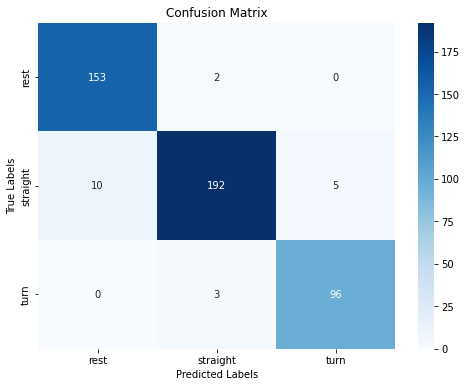

Classification Report:

              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [15]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = grid.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

class_labels = sorted(y_test.unique())  # Unique labels from y_test

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=[str(label) for label in class_labels]))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The model fits the dataset exceptionally well, with overall high performance across all metrics (accuracy, precision, recall, F1-score), and it generalizes effectively to new data: 0.95 (validation set) and 0.96 (test set).
2.  Even though we could experiment with a wider range of values or finer intervals, the selected C and gamma values are already suitable (the validation and test scores from the grid search confirm that these values allow the model to generalize well without overfitting or underfitting)

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [16]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 mark)
y1 = test_set1["motion_state"]  # Target vector
X1 = test_set1.drop(columns=["motion_state"])  # All features
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [17]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2["motion_state"]  # Target vector
X2 = test_set2.drop(columns=["motion_state"])  # All features
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score. 

In [18]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 mark)

print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

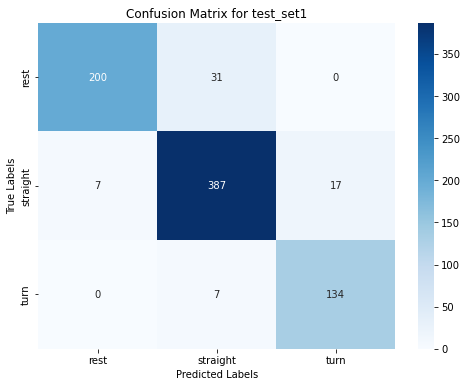

Classification Report for test_set1:

              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [19]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 mark)

y1_pred = grid.predict(X1)

conf_matrix1 = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

class_labels = sorted(y1.unique())  

print("Classification Report for test_set1:\n")
print(classification_report(y1, y1_pred, target_names=[str(label) for label in class_labels]))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

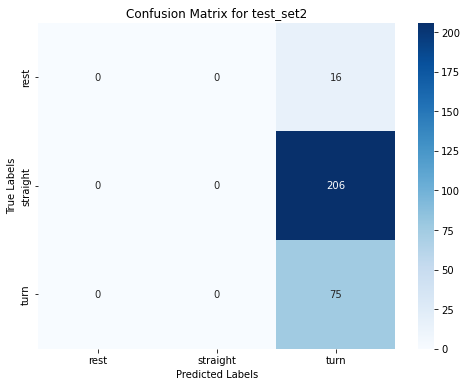

Classification Report for test_set2:

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

y2_pred = grid.predict(X2)

conf_matrix2 = confusion_matrix(y2, y2_pred)

class_labels = sorted(y2.unique()) 

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

print("Classification Report for test_set2:\n")
print(classification_report(y2, y2_pred, target_names=[str(label) for label in class_labels]))

___

#### 1.3.3 - Questions 

**Based on results so far** 
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. 
   - (X_test, y_test): The model performs very well on this dataset with 96% accuracy, demonstrating good generalization for data similar to the training set.
   - (X1, y1): The model achieves 92% accuracy on test_set1, indicating that it generalizes well to slightly different but related data distributions.
   - (X2, y2): The model performs very poorly on test_set2, with only 25% accuracy. Based on the classification matrix (X2, y2), it predicts only the "turn" class, failing to differentiate between other classes.

   The significant difference in performance is an example of model bias and failure to generalize: the model appears to heavily favor the "turn" class. This suggests the model has learned a bias toward "turn" that overpowers its ability to classify "straight" and "rest" correctly.

2. 
   The poor performance on test_set2 (X2, y2) can be attributed to model bias, failure to generalize due to feature distribution differences, overfitting to training data, and potentially inadequate decision boundaries for all classes during training.

   For example, in the two cells below, we can observe differences in means, standard deviations, and ranges for several features (ax_sum, ay_sum, gz_sum etc) for the `rest` class specifically. This confirms that the distributions in test_set2 differ from cv_set.

In [21]:
cv_set_rest = cv_set[cv_set["motion_state"] == "rest"]
test_set2_rest = test_set2[test_set2["motion_state"] == "rest"]

# summary statistics for the 'rest' class in cv_set
print("Summary statistics for 'rest' in cv_set:\n")
cv_set_rest.describe()

Summary statistics for 'rest' in cv_set:



,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,5.170000e+02,5.170000e+02,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.078184,0.124857,9.783674,-0.002158,0.000157,-0.001575,9.801240,0.021403,1.210371e-06,1.308967e-07,...,0.024134,0.000006,0.002110,0.001100,0.024795,0.000121,0.000078,0.000076,0.024846,0.000143
std,0.313126,0.103521,0.006414,0.000693,0.000564,0.000560,0.003759,0.000658,1.556832e-07,7.160495e-08,...,0.000096,0.000002,0.000849,0.000349,0.000091,0.000015,0.000010,0.000010,0.000094,0.000014
min,-0.582320,-0.099982,9.754406,-0.004150,-0.002139,-0.003173,9.775991,0.019505,5.172373e-07,2.063139e-08,...,0.023589,0.000001,0.000351,0.000357,0.024633,0.000086,0.000058,0.000052,0.024669,0.000112
25%,-0.208788,0.073061,9.779810,-0.002648,-0.000217,-0.001935,9.800108,0.020941,1.123517e-06,8.296247e-08,...,0.024082,0.000005,0.001277,0.000905,0.024733,0.000110,0.000070,0.000069,0.024779,0.000133
50%,0.187432,0.110011,9.785791,-0.002158,0.000159,-0.001583,9.801258,0.021407,1.212973e-06,1.208452e-07,...,0.024157,0.000006,0.002307,0.001016,0.024777,0.000119,0.000077,0.000076,0.024824,0.000141
75%,0.240897,0.132071,9.788045,-0.001728,0.000572,-0.001177,9.802323,0.021842,1.306314e-06,1.571923e-07,...,0.024200,0.000008,0.002535,0.001185,0.024839,0.000131,0.000084,0.000082,0.024897,0.000151
max,0.551894,0.541385,9.805618,-0.000014,0.001850,0.000168,9.826729,0.023994,1.675834e-06,7.324846e-07,...,0.024352,0.000015,0.003716,0.003244,0.025375,0.000176,0.000121,0.000119,0.025437,0.000196


In [22]:
# summary statistics for the 'rest' class in test_set2
print("\nSummary statistics for 'rest' in test_set2:\n")
test_set2_rest.describe()


Summary statistics for 'rest' in test_set2:



,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,1.600000e+01,1.600000e+01,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,-0.047552,0.313710,9.790803,-0.002728,0.002288,-0.002643,9.800630,0.012786,2.114008e-06,1.991211e-07,...,0.046371,0.000010,0.002406,0.002702,0.051560,0.000101,0.000113,0.000082,0.051634,0.000154
std,0.003779,0.012481,0.003955,0.000505,0.000551,0.000586,0.003892,0.000376,4.951322e-07,1.532236e-07,...,0.001068,0.000004,0.000473,0.000603,0.001058,0.000023,0.000012,0.000011,0.001050,0.000012
min,-0.055452,0.305907,9.782088,-0.003759,0.001311,-0.004016,9.791608,0.012217,1.071256e-06,5.710469e-08,...,0.044736,0.000004,0.001666,0.002141,0.049701,0.000074,0.000096,0.000059,0.049764,0.000132
25%,-0.050191,0.308979,9.788383,-0.002980,0.001895,-0.003048,9.798080,0.012487,1.872385e-06,1.282325e-07,...,0.045662,0.000007,0.002211,0.002375,0.050438,0.000088,0.000107,0.000077,0.050664,0.000146
50%,-0.047541,0.310405,9.790978,-0.002553,0.002305,-0.002638,9.800497,0.012755,2.162247e-06,1.517817e-07,...,0.045958,0.000011,0.002343,0.002440,0.052008,0.000096,0.000112,0.000080,0.052075,0.000155
75%,-0.044947,0.311304,9.794282,-0.002400,0.002669,-0.002222,9.803854,0.012906,2.388035e-06,1.931158e-07,...,0.047277,0.000014,0.002515,0.002879,0.052354,0.000105,0.000117,0.000084,0.052410,0.000163
max,-0.040543,0.358398,9.797019,-0.002070,0.003149,-0.001776,9.806844,0.013805,2.941472e-06,6.859937e-07,...,0.048406,0.000017,0.003880,0.004130,0.053072,0.000157,0.000140,0.000111,0.053132,0.000174


___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [23]:
# TODO - Load selected features from cv_set to X
# (1 marks)
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [24]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [25]:
# TODO - Perform model training and tuning using `GridSearchCV`

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

pipe = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', SVC())  
])

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  
    'classifier__C': [0.01, 0.1, 1, 10, 100],  
    'classifier__gamma': [0.001, 0.01, 0.1, 1],  
    'classifier__kernel': ['rbf']  
}

grid = GridSearchCV(
    pipe,  
    param_grid, 
    cv=5,  
    scoring='accuracy', 
    return_train_score=True  
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [26]:
# Print the results from the grid search

print("Best params:\n{}".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation test score: {:.2f}".format(grid.best_estimator_.score(X_test, y_test)))

test_score = grid.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_score))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}
Best cross-validation train score: 0.82
Best cross-validation test score: 0.83
Test-set score: 0.83


In [27]:
## The test set (X_test, y_test) and the cross-validation set (from X_train during the grid search) are fairly similar, 
## and thus the model's performance on both is nearly identical.

Display the confusion matrix and print the classification report for the trained model using the *test* split. 

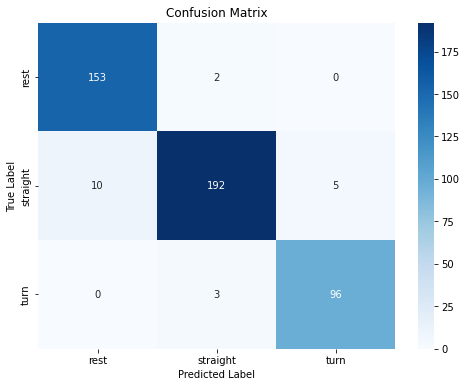

Classification Report:

              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [28]:
# TODO - Display confusion matrix and print classification reports
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(class_report)

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer 
1. 
The model in Section 1.2.3 is the better fit. The best cross-validation train score is 1.00, so it demonstrates strong generalization. The model achieves a high best cross-validation validation score of 0.95. <br>
In contrast, the model in Section 2.1.3 shows lower performance, with a best cross-validation train score of 0.82, a best cross-validation test score of 0.83. This indicates that Section 2’s model is slightly underfitting and generalizes worse than the model in 1.2.3.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2. 
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [29]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]

# Display the first 2 rows of X1
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [30]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]

# Display the first 2 rows of X2
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score. 

In [31]:
# TODO - Print test score accuracies for test_set1 and test_set2

test_score1 = grid.score(X1, y1)  # Accuracy on test_set1
print("test_set1 score: {:.2f}".format(test_score1))

test_score2 = grid.score(X2, y2)  # Accuracy on test_set2
print("test_set2 score: {:.2f}".format(test_score2))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

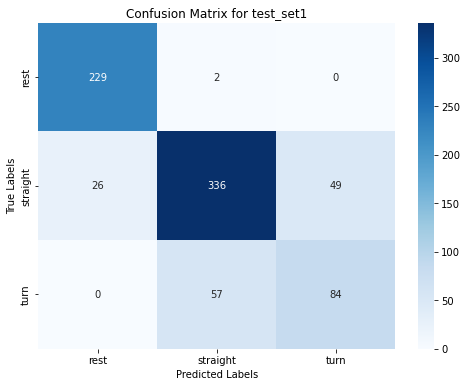

Classification Report for test_set1:

              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [32]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 mark)

y1_pred = grid.best_estimator_.predict(X1)

conf_matrix1 = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

class_labels = sorted(y1.unique())  

print("Classification Report for test_set1:\n")
print(classification_report(y1, y1_pred, target_names=[str(label) for label in class_labels]))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

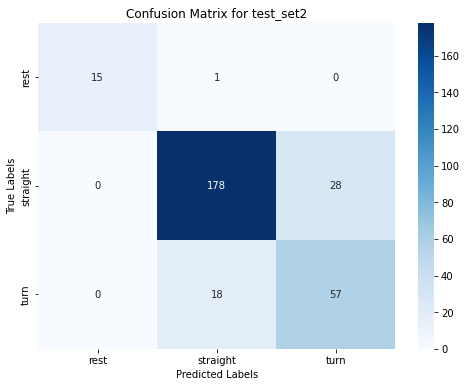

Classification Report for test_set2:

              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [33]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

y2_pred = grid.best_estimator_.predict(X2)

conf_matrix2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

class_labels = sorted(y2.unique()) 

print("Classification Report for test_set2:\n")
print(classification_report(y2, y2_pred, target_names=[str(label) for label in class_labels]))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. The model performs well with a training score of 0.82, validation score of 0.83, and test-set scores of 0.83 and 0.84. It proves consistent performance across all datasets.

2. In Section 1, the test-set score is 0.96 and test_set1 is at 0.92 which is a great performance, but we observe poor performance on test_set2 (0.25) - strong overfitting. In Section 2, the model is more consistent with a test-set score of 0.83, test_set1 at 0.83, and test_set2 at 0.84. It shows a better fit across all datasets.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


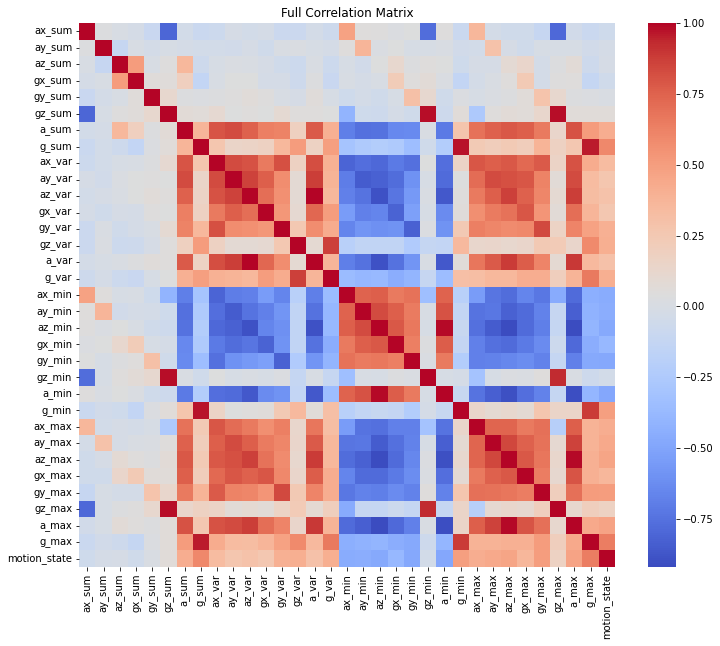

In [34]:
from sklearn.preprocessing import LabelEncoder

cv_set_copy = cv_set.copy()

if cv_set_copy["motion_state"].dtype == 'object':
    le = LabelEncoder()
    cv_set_copy["motion_state"] = le.fit_transform(cv_set_copy["motion_state"])

correlation_matrix = cv_set_copy.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Full Correlation Matrix")
plt.show()

In [35]:
target_correlation = correlation_matrix["motion_state"].drop("motion_state").sort_values(key=abs, ascending=False)
top_10_features = target_correlation.head(10).index
print(f"Top 10 Features Most Correlated with 'motion_state':\n{top_10_features.tolist()}")

Top 10 Features Most Correlated with 'motion_state':
['g_max', 'g_sum', 'gy_max', 'g_min', 'a_min', 'gy_min', 'a_max', 'az_min', 'az_max', 'ax_min']


In [36]:
top_10_correlation_matrix = correlation_matrix.loc[top_10_features, top_10_features]
correlation_threshold = 0.9
to_remove = set()
for feature in top_10_features:
    if feature not in to_remove:
        highly_correlated = top_10_correlation_matrix[feature][abs(top_10_correlation_matrix[feature]) > correlation_threshold].index
        for redundant_feature in highly_correlated:
            if redundant_feature != feature:
                to_remove.add(redundant_feature)

non_redundant_features = [feature for feature in top_10_features if feature not in to_remove]

print(f"Redundant Features Removed: {to_remove}")
print(f"Non-Redundant Features to Use for ML:\n{non_redundant_features}")

Redundant Features Removed: {'az_min', 'az_max', 'g_sum', 'a_max'}
Non-Redundant Features to Use for ML:
['g_max', 'gy_max', 'g_min', 'a_min', 'gy_min', 'ax_min']


**Answer**
1.  <br> The selected features are: 'g_max', 'gy_max', 'g_min', 'a_min', 'gy_min', 'ax_min'. To select them we did this:
- We plotted the full correlation matrix, 
- selected the top 10 features most correlated with the target feature, 
- removed redundant features, and 
- selected the remaining features to use for ML

In [37]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['g_max', 'gy_max', 'g_min', 'a_min', 'gy_min', 'ax_min']]

# Display the first 2 rows of X
X.head(2)

,g_max,gy_max,g_min,a_min,gy_min,ax_min
0,0.000187,0.000075,0.000003,0.023871,-0.00007,-0.001539
1,0.000144,0.000098,0.000006,0.024153,-0.00008,-0.001752


In [38]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [39]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

pipe = Pipeline([
    ('scaler', StandardScaler()),  # Default scaler
    ('classifier', SVC())  # Default SVC classifier
])

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  
    'classifier__C': [0.01, 0.1, 1, 10, 100],  
    'classifier__gamma': [0.001, 0.01, 0.1, 1],  
    'classifier__kernel': ['rbf']  
}

grid = GridSearchCV(
    pipe,  
    param_grid,  
    cv=5, 
    scoring='accuracy',  
    return_train_score=True  
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [40]:
# TODO: Print the results from the grid search

print("Best params:\n{}".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.best_estimator_.score(X_train, y_train)))

test_score = grid.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_score))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}
Best cross-validation train score: 0.91
Best cross-validation validation score: 0.94
Test-set score: 0.92


Display the confusion matrix and print the classification report for the trained model using the *test* split. 

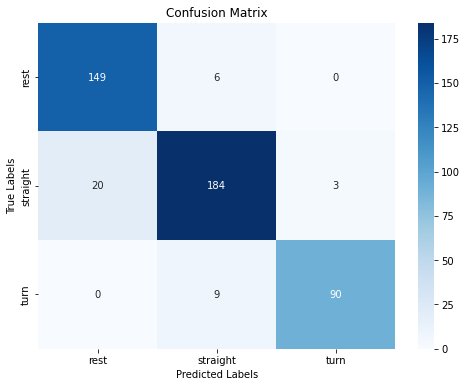

Classification Report:

              precision    recall  f1-score   support

        rest       0.88      0.96      0.92       155
    straight       0.92      0.89      0.91       207
        turn       0.97      0.91      0.94        99

    accuracy                           0.92       461
   macro avg       0.92      0.92      0.92       461
weighted avg       0.92      0.92      0.92       461



In [41]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

class_labels = sorted(y_test.unique())  

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=[str(label) for label in class_labels]))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2. 
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [42]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']  
X1 = test_set1[['g_max', 'gy_max', 'g_min', 'a_min', 'gy_min', 'ax_min']]  

# Display the first 2 rows of X1 to verify
X1.head(2)

,g_max,gy_max,g_min,a_min,gy_min,ax_min
0,0.000170,0.000078,0.000003,0.024056,-0.000065,-0.001191
1,0.000201,0.000095,0.000007,0.024084,-0.000076,-0.001104


In [43]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']  
X2 = test_set2[['g_max', 'gy_max', 'g_min', 'a_min', 'gy_min', 'ax_min']]  

# Display the first 2 rows of X2 to verify
X2.head(2)

,g_max,gy_max,g_min,a_min,gy_min,ax_min
0,0.000142,0.000115,0.000007,0.048406,-0.000095,-0.002970
1,0.000151,0.000140,0.000013,0.047696,-0.000132,-0.003824


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score. 

In [44]:
# TODO - Print test score accuracies for test_set1 and test_set2

test_score1 = grid.score(X1, y1) 
print("test_set1 score: {:.2f}".format(test_score1))

test_score2 = grid.score(X2, y2) 
print("test_set2 score: {:.2f}".format(test_score2))

test_set1 score: 0.89
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

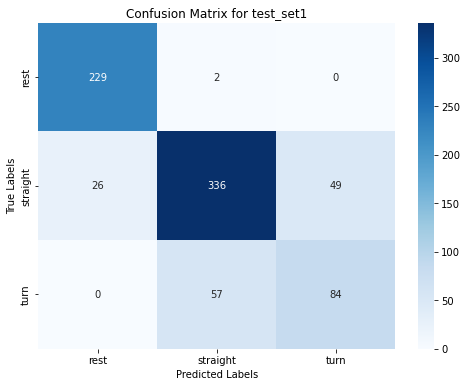

Classification Report for test_set1:

              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [45]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

y1 = y1.astype(str)  
y1_pred = y1_pred.astype(str)  

conf_matrix1 = confusion_matrix(y1, y1_pred)

class_labels = sorted(y1.unique()) 

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

print("Classification Report for test_set1:\n")
print(classification_report(y1, y1_pred, target_names=[str(label) for label in class_labels]))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

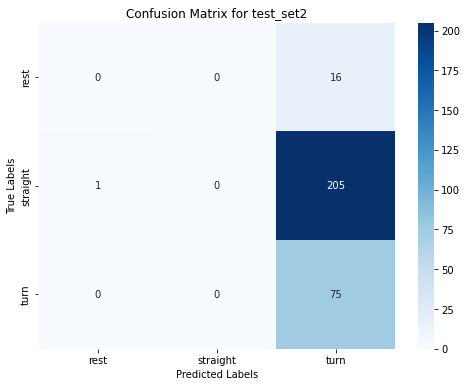

Classification Report for test_set2:

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

y2_pred = grid.best_estimator_.predict(X2)

conf_matrix2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

class_labels = sorted(y2.unique())  

print("Classification Report for test_set2:\n")
print(classification_report(y2, y2_pred, target_names=[str(label) for label in class_labels]))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*. 

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1. In Section 1, the model has a test-set score of 0.96, test_set1 at 0.92, and test_set2 at 0.25 - overfitting. In Section 2, the model performs consistently with test-set score of 0.83, test_set1 at 0.83, and test_set2 at 0.84 - a better fit. In Section 3, the model has a test-set score of 0.92, test_set1 at 0.89, and test_set2 at 0.25 - overfitting as well.

    Section 2 provides the most consistent performance across all datasets. <br> <br> <br> 

2. Model 1 includes all features, which means it also has irrelevant and noisy features, which leads to overfitting and poor performance on test_set2. By selecting only the right features (as in Model 2), the model can focus on the most important ones, improving its performance. These features might have been chosen by a professional with industry knowledge, making them more relevant for the general task.

    In Section 3, the model used the top 6 correlated features. While these features were useful for the training set, test_set2 might have had different patterns that the selected features couldn't capture, leading to poor performance on test_set2.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [47]:
# TODO - Load all features from cv_set to X
X = cv_set.drop(columns=['motion_state']) 

# Display the first 2 rows of X to verify
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [48]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [49]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [50]:
# Perform any missing imports
from sklearn.decomposition import PCA

# TODO - Initiate the pipeline 
# (1 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA()),  
    ('classifier', SVC()) 
])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [51]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'pca__n_components': [4,7,11,14,16],  
    'classifier__C': [0.01, 0.1, 1, 10, 100],  
    'classifier__gamma': [0.001, 0.01, 0.1, 1],  
    'classifier__kernel': ['rbf', 'linear'] 
}

In [52]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf', 'linear'],
                         'pca__n_components': [4, 7, 11, 14, 16]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [53]:
# TODO: Print the results from the grid search

print("Best params:\n{}".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.best_estimator_.score(X_train, y_train)))
test_score = grid.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_score))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.001, 'classifier__kernel': 'linear', 'pca__n_components': 14}
Best cross-validation train score: 0.94
Best cross-validation validation score: 0.96
Test-set score: 0.95


Display the confusion matrix and print the classification report for the trained model using the *test* split. 

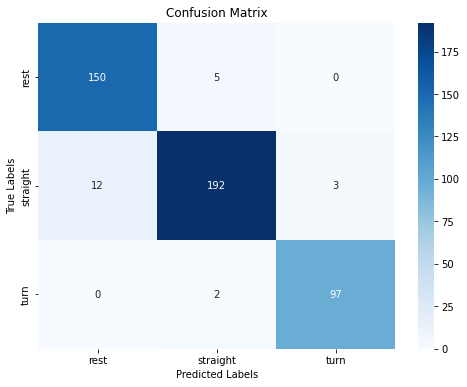

Classification Report:

              precision    recall  f1-score   support

        rest       0.93      0.97      0.95       155
    straight       0.96      0.93      0.95       207
        turn       0.97      0.98      0.97        99

    accuracy                           0.95       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.95      0.95      0.95       461



In [54]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = sorted(y_test.unique())  

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=[str(label) for label in class_labels]))

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [55]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 = test_set1['motion_state'] 
X1 = test_set1.drop(columns=['motion_state']) 

# Display the first 2 rows of X1 to verify
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [56]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state'] 
X2 = test_set2.drop(columns=['motion_state']) 

# Display the first 2 rows of X2 to verify
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [57]:
# TODO - Print test score accuracies for test_set1 and test_set2
test_score1 = grid.score(X1, y1) 
print("test_set1 score: {:.2f}".format(test_score1))

test_score2 = grid.score(X2, y2) 
print("test_set2 score: {:.2f}".format(test_score2))

test_set1 score: 0.92
test_set2 score: 0.73


Display confusion matrix and print classification report for (X1, y1)

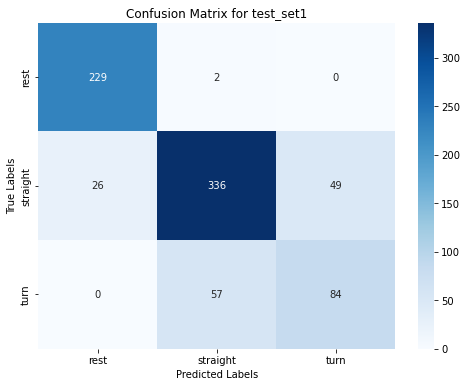

Classification Report for test_set1:

              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [58]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1 = y1.astype(str)  
y1_pred = y1_pred.astype(str) 

conf_matrix1 = confusion_matrix(y1, y1_pred)

class_labels = sorted(y1.unique()) 

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

print("Classification Report for test_set1:\n")
print(classification_report(y1, y1_pred, target_names=[str(label) for label in class_labels]))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

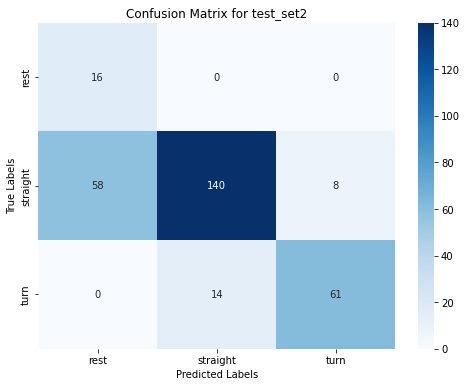

Classification Report for test_set2:

              precision    recall  f1-score   support

        rest       0.22      1.00      0.36        16
    straight       0.91      0.68      0.78       206
        turn       0.88      0.81      0.85        75

    accuracy                           0.73       297
   macro avg       0.67      0.83      0.66       297
weighted avg       0.87      0.73      0.77       297



In [59]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.best_estimator_.predict(X2)

conf_matrix2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

class_labels = sorted(y2.unique()) 

print("Classification Report for test_set2:\n")
print(classification_report(y2, y2_pred, target_names=[str(label) for label in class_labels]))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*. 
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

1. Section 1 showed overfitting, with great performance on training and test_set1, but poor generalization to test_set2.
Section 2 performed consistently well across all datasets, with stable performance on test_set1 (0.83) and test_set2 (0.84), showing the best balance between generalization and accuracy.
Section 3 showed good performance on test_set1 (0.89) but struggled with test_set2 (0.25), suggesting feature mismatch or overfitting.
Section 4 had improved performance on test_set2 (0.72) compared to Section 1 and Section 3, but still did not match Section 2's consistency.
<br> <br>
2. Section 1 likely overfitted due to using all features, including irrelevant or noisy ones, leading to poor performance on test_set2 (0.25).

    Section 4, using PCA, reduced dimensionality and noise, improving test_set2 performance (0.72), but still didn’t match the consistency of Section 2 due to possible loss of important features during the PCA transformation.

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer** 
1. We chose Neural Networks because we were interested to try it and see how it performs in practice.

    We also tried Random Forest (please see other branches).

In [92]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]  # Group selected features

# Display the first 2 rows of X to verify
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [93]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state'] 

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [94]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

In [95]:
from sklearn.neural_network import MLPClassifier  

# TODO - Initiate the pipeline with a neural network
pipe = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', MLPClassifier()) 
])

In [96]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (100, 50)],  
    'classifier__activation': ['relu', 'tanh'], 
    'classifier__solver': ['adam', 'sgd'],  
    'classifier__alpha': [0.0001, 0.001, 0.01],  
    'classifier__learning_rate': ['constant', 'adaptive'], 
    'classifier__max_iter': [200, 500, 1000]
}

In [97]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', MLPClassifier())]),
             param_grid={'classifier__activation': ['relu', 'tanh'],
                         'classifier__alpha': [0.0001, 0.001, 0.01],
                         'classifier__hidden_layer_sizes': [(50,), (100,),
                                                            (100, 50)],
                         'classifier__learning_rate': ['constant', 'adaptive'],
                         'classifier__max_iter': [200, 500, 1000],
                         'classifier__solver': ['adam', 'sgd']},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [98]:
# Print the results from the grid search

print("Best parameters:\n{}".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.best_estimator_.score(X_train, y_train)))

test_score = grid.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_score))

Best parameters:
{'classifier__activation': 'tanh', 'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (100, 50), 'classifier__learning_rate': 'constant', 'classifier__max_iter': 1000, 'classifier__solver': 'adam'}
Best cross-validation train score: 0.84
Best cross-validation validation score: 0.86
Test-set score: 0.85


Display the confusion matrix and print the classification report for the trained model using the *test* split. 

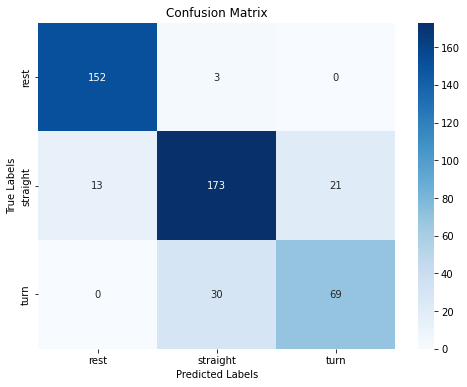

Classification Report:

              precision    recall  f1-score   support

        rest       0.92      0.98      0.95       155
    straight       0.84      0.84      0.84       207
        turn       0.77      0.70      0.73        99

    accuracy                           0.85       461
   macro avg       0.84      0.84      0.84       461
weighted avg       0.85      0.85      0.85       461



In [99]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

class_labels = sorted(y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=[str(label) for label in class_labels]))

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2. 
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [100]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]  

X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [101]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state'] 
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]  

X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score. 

In [102]:
# TODO - Print test score accuracies for test_set1 and test_set2

test_score1 = grid.score(X1, y1) 
print("test_set1 score: {:.2f}".format(test_score1))

test_score2 = grid.score(X2, y2) 
print("test_set2 score: {:.2f}".format(test_score2))

test_set1 score: 0.85
test_set2 score: 0.78


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

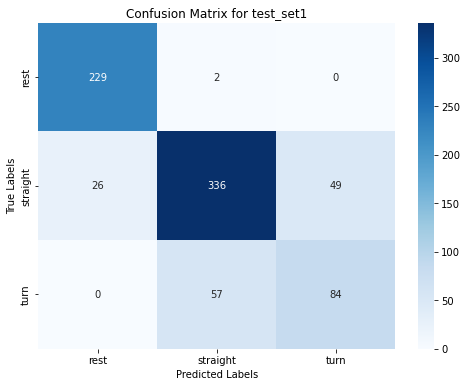

Classification Report for test_set1:

              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [103]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1 = y1.astype(str) 
y1_pred = y1_pred.astype(str) 

conf_matrix1 = confusion_matrix(y1, y1_pred)

class_labels = sorted(y1.unique())


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

print("Classification Report for test_set1:\n")
print(classification_report(y1, y1_pred, target_names=[str(label) for label in class_labels]))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

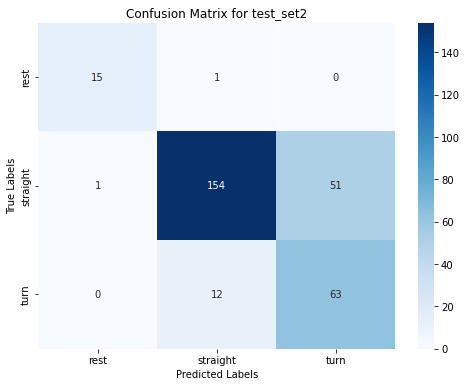

Classification Report for test_set2:

              precision    recall  f1-score   support

        rest       0.94      0.94      0.94        16
    straight       0.92      0.75      0.83       206
        turn       0.55      0.84      0.67        75

    accuracy                           0.78       297
   macro avg       0.80      0.84      0.81       297
weighted avg       0.83      0.78      0.79       297



In [104]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.best_estimator_.predict(X2)

conf_matrix2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

class_labels = sorted(y2.unique()) 

print("Classification Report for test_set2:\n")
print(classification_report(y2, y2_pred, target_names=[str(label) for label in class_labels]))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer 
1. SVC performed consistently well across all datasets, with balanced performance. Neural Network (MLPClassifier) showed slightly lower performance on test_set2 (0.78) but still performed well on test_set1 (0.85), it means that it generalizes reasonably well. <br>
    The Neural Network may have learned some specific patterns from the training data that don’t generalize as well to test_set2, causing a slight performance difference.

____